In [60]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from pathlib import Path

In [61]:
# Initializing clean csv file

cleanpath = Path('../csv/clean_data.csv')
file = pd.read_csv(cleanpath)
file.head()


,ID,SEX,TOTAL CHOLESTROL,AGE,SMOKING STATUS,CIGS PER DAY,EDUCATION,PREVALENT CHD,PERIOD,BMI
0,6238,F,250.0,46,NO,0,2,NO,1,28.73
1,6238,F,260.0,52,NO,0,2,NO,2,29.43
2,6238,F,237.0,58,NO,0,2,NO,3,28.50
3,11263,F,228.0,43,NO,0,2,NO,1,30.30
4,11263,F,230.0,49,NO,0,2,NO,2,31.36


In [32]:
##PSEUDO-CODING:
# FIRST) compare participant's SEX and their PREVCHD. (ID,SEX,PREVCHD, PERIOD==1)
#   cut down columns to ID, SEX, PREVCHD, PERIOD (sex_df)
#   Filter by (Period == 1)
#   Create a new df with Period == 3 to compare to P1.

# SECOND) display it in a graph (double bar graph OR pie graph to showcase which sex had more CHD.)
#   x_axis = np.arange(len(sexes) 
#   y_axis_chd = <df>
#       ADD CONIDITON: 'PREVALENT CHD' == 'YES'
#       chdyes = <df>.loc[<df>["PREVALENT CHD"]== 'YES',:].count() 
#   sexes = ['F','M']
#   colors= ['coral','lightblue']
#   plt.plot(x-axis, y-axis, color=colors, align = 'center' )
#   plt.xlabel("Sex")
#   plt.ylabel("Count of Prevalent CHD")
#   plt.show()

# THIRD) compare sex AND smoking with CHD.
#   new df, with followings columns: ID,SEX,PREVCHD, & SMOKING STATUS (sex_smoke_df)
#   filter by Period == 1
#   Compare to another filtered by Period == 3.

# FOURTH) Sex and CHOL and CHD


In [121]:
# The key focus in this segment is the subtopic: Sex and it's correlation with CHD

#Narrow down data set to relevant columns

sex_df = file[['ID','SEX','PREVALENT CHD','PERIOD']]
sex_df.head(10)

#filter by Period == 1

sex_p1 = pd.DataFrame()
sex_p1 = sex_df.loc[sex_df['PERIOD']==1,:]
sex_p1

sex_p1 = sex_p1[['ID','SEX','PREVALENT CHD']]

# filter to view totals among both sexes, with just ID, SEX AND CHD
#Seperated data by Sex and Period 1 only
#This section is mainly for debugging purposes, to make sure data is being filtered correctly.

female_p1 = sex_p1.loc[sex_p1['SEX']=='F',:]
female_p1

male_p1 = sex_p1.loc[sex_p1['SEX']=='M',:]
male_p1

#Once again split data further, by PREVALENT CHD (yes or no)

male_p1_chd= male_p1.loc[male_p1['PREVALENT CHD']=='YES',:]
male_p1_chd.count()

female_p1_chd = female_p1.loc[female_p1['PREVALENT CHD']=='YES',:]
female_p1_chd

### >>>> FINDINGS/OBSERVATIONS <<<<
#   2754 total rows count (P1)
#   1546 rows of FEMALES
#       25 w/ CHD
#   1208 rows of MALES (F>M)
#       39 with CHD (Fchd < F0)

#     so Mchd > Fchd, despite there being more females in the pool

,ID,SEX,PREVALENT CHD
420,556045,F,YES
426,571377,F,YES
717,870652,F,YES
1716,2080190,F,YES
1761,2134396,F,YES
1983,2408348,F,YES
2160,2646666,F,YES
2190,2682411,F,YES
2304,2839250,F,YES
2541,3117784,F,YES


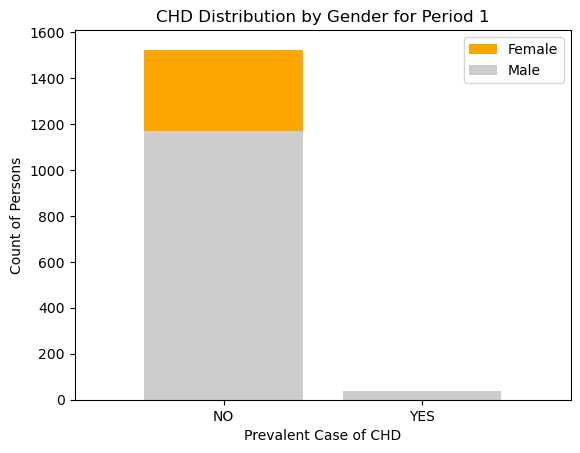

In [132]:
# PERIOD 1 PLOTTING: SEX AND CHD PREVALENCE

sexes = ['F','M']
yesorno = ['NO','YES']

female_axis=female_p1.groupby(['PREVALENT CHD'])['ID'].count()
female_axis

male_axis= male_p1.groupby(['PREVALENT CHD'])['ID'].count()
male_axis
                
# Double plotting for both sexes individually
plt.bar(sexes,female_axis,label='Female',color='orange',align='center')
plt.bar(sexes,male_axis,label='Male',color='0.80',align='center')

tick_locations = [value for value in sexes]
plt.xticks(tick_locations, yesorno)

plt.title('CHD Distribution by Gender for Period 1')
plt.xlabel("Prevalent Case of CHD")
plt.ylabel("Count of Persons")
plt.xlim(-0.75,len(sexes)-0.25)
plt.ylim(0,(male_p1['PREVALENT CHD']=='YES').count()+400)
plt.legend()
plt.show()

In [129]:
# Now repeat steps from before but for data when PERIOD ==3 for comparison

#filtering by PERIOD == 3

sex_p3 = pd.DataFrame()
sex_p3 = sex_df.loc[sex_df['PERIOD']==3,:]
sex_p3

sex_p3 = sex_p3[['ID','SEX','PREVALENT CHD']]
sex_p3

female_p3 = sex_p3.loc[sex_p3['SEX']=='F',:]
female_p3

male_p3 = sex_p3.loc[sex_p3['SEX']=='M',:]
male_p3

#Once again split data further, by PREVALENT CHD (yes or no)

male_p3_chd= male_p3.loc[male_p3['PREVALENT CHD']=='YES',:]
male_p3_chd.count()

female_p3_chd = female_p3.loc[female_p3['PREVALENT CHD']=='YES',:]
female_p3_chd

##FINDINGS FOR PERIOD 3
#   2754 rows count (matches P1)
#   1546 count of FEMALES
#       127 W/CHD
#   1208 rows of MALES
#       173 W/ CHD

#   Pattern continues with Mchd > Fchd


,ID,SEX,PREVALENT CHD
101,134914,F,YES
155,199546,F,YES
194,228129,F,YES
254,344720,F,YES
263,359422,F,YES
...,...,...,...
8024,9689494,F,YES
8060,9746116,F,YES
8165,9868819,F,YES
8192,9906195,F,YES


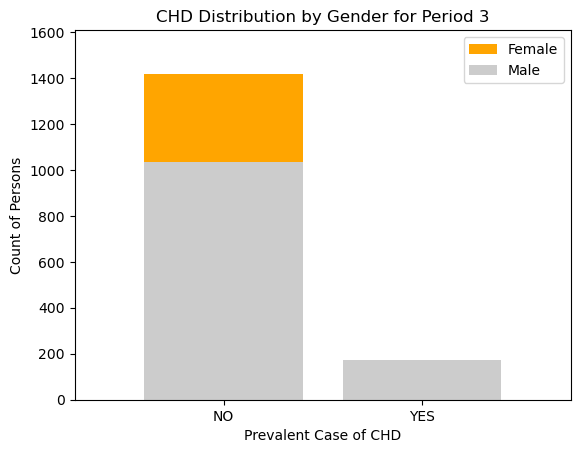

In [136]:
# PERIOD 3 PLOTTING: SEX AND CHD PREVALENCE

sexes = ['F','M']
yesorno = ['NO','YES']

female_axis2=female_p3.groupby(['PREVALENT CHD'])['ID'].count()
female_axis2

male_axis2= male_p3.groupby(['PREVALENT CHD'])['ID'].count()
male_axis2
                
# Double plotting for both sexes individually
plt.bar(sexes,female_axis2,label='Female',color='orange',align='center')
plt.bar(sexes,male_axis2,label='Male',color='0.80',align='center')

tick_locations = [value for value in sexes]
plt.xticks(tick_locations, yesorno)

plt.title('CHD Distribution by Gender for Period 3')
plt.xlabel("Prevalent Case of CHD")
plt.ylabel("Count of Persons")
plt.xlim(-0.75,len(sexes)-0.25)
plt.ylim(0,(male_p1['PREVALENT CHD']=='YES').count()+400)
plt.legend()
plt.show()

In [139]:
# SEX, SMOKING AND CHD 

# Creating a new dataframe with relevant columns
smoking_df = file[['ID','SEX','SMOKING STATUS','PREVALENT CHD','PERIOD']]
smoking_df.head()

# Split data by Period 1 and Period 3 
smoking_p1 = pd.DataFrame()
smoking_p1 = smoking_df.loc[smoking_df['PERIOD']==1,:]
smoking_p1

smoking_p3 = pd.DataFrame()
smoking_p3 = smoking_df.loc[smoking_df['PERIOD']==3,:]
smoking_p3

#   <Checkpoint>
#   2754 = Total rows


,ID,SEX,SMOKING STATUS,PREVALENT CHD,PERIOD
2,6238,F,NO,NO,3
5,11263,F,NO,NO,3
8,14367,M,NO,NO,3
11,16365,M,NO,NO,3
14,23727,F,NO,NO,3
...,...,...,...,...,...
8249,9973350,F,NO,NO,3
8252,9978986,F,NO,NO,3
8255,9982118,M,NO,NO,3
8258,9990894,F,YES,NO,3
